### Modelling

In [2]:
#importing libraries we may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
credit_df=pd.read_csv(r'C:\Users\Robin\Downloads\capstone_project\_data\credit-df-dataset-cleaned.csv') # change to the cleaned dataset

We will be using log transformed data as 

In [14]:
credit_df_log=credit_df.iloc[:,4:22]
credit_df_log

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3,3,0,0,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0
1,0,3,1,1,1,3,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,1,1,1,1,1,1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,1,1,1,1,1,1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,1,0,1,1,1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,1,1,1,1,1,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,0,0,0,0,1,1,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,5,4,3,0,1,1,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,2,0,1,1,1,0,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [16]:
c=np.log(credit_df_log)

c:\Users\Robin\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\Robin\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


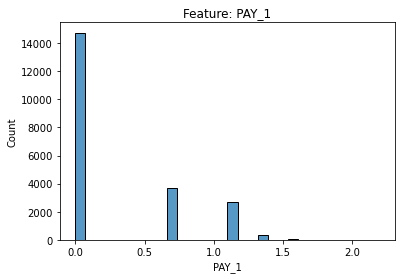

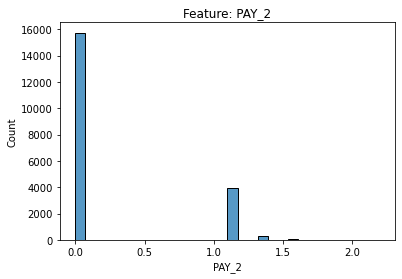

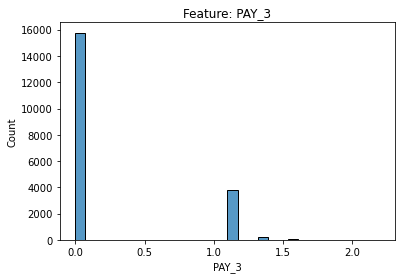

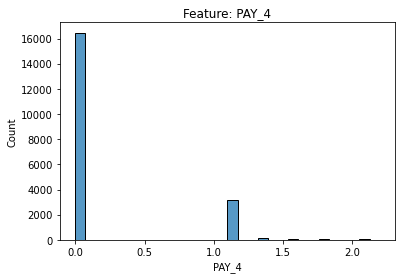

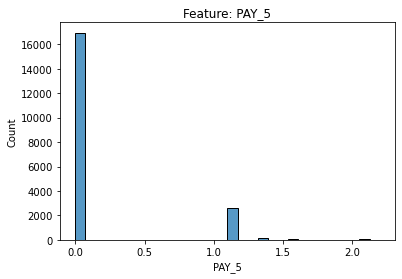

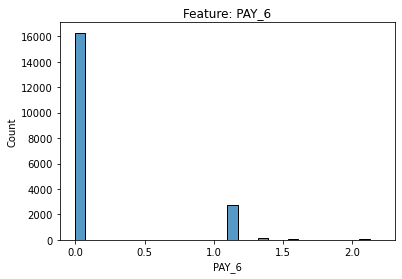

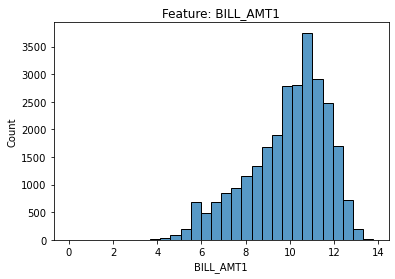

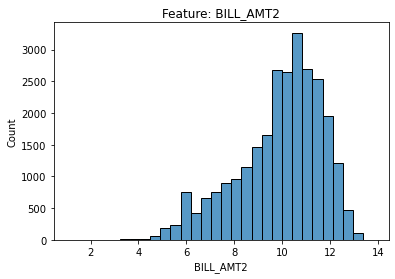

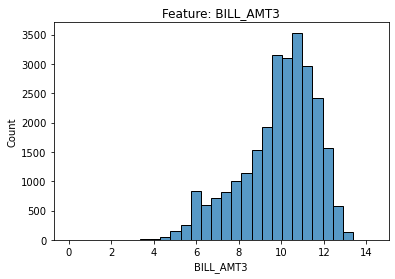

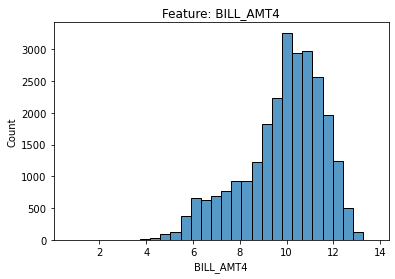

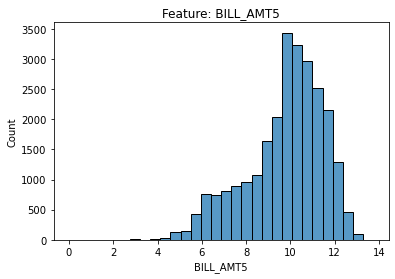

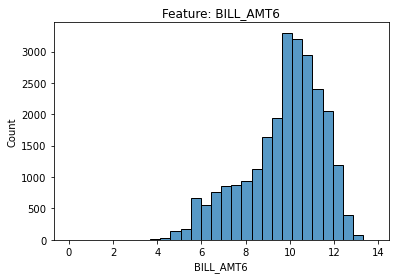

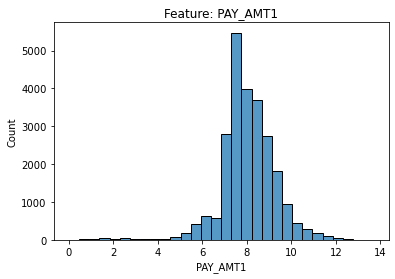

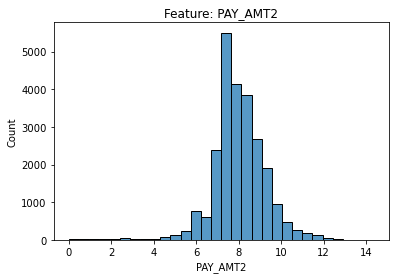

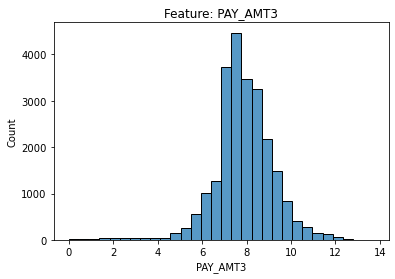

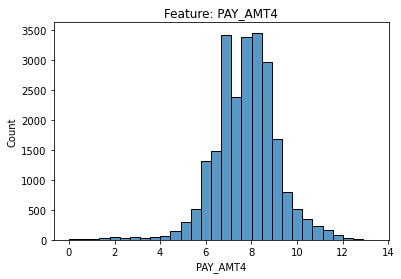

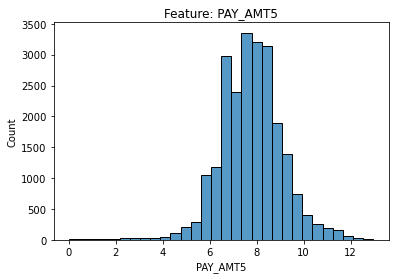

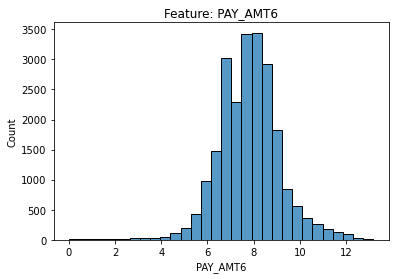

In [19]:
# for col in c.columns:
#     plt.figure()
#     plt.title(f'Feature: {col}')
#     sns.histplot(c[col],bins=30)
#     plt.show()

In [ ]:
#define target and feature columns
y=credit_df['DEFAULT']
X=credit_df.loc[:, credit_df.columns != 'DEFAULT']

In [20]:
target = credit_df['DEFAULT']
predictors = credit_df.loc[:, credit_df.columns != 'DEFAULT']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,plot_confusion_matrix,classification_report


    
    
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1 test: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5995
           1       0.00      0.20      0.00         5

    accuracy                           0.78      6000
   macro avg       0.50      0.49      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4679 1316]
 [   4    1]]

Accuracy Score for model1 test:  0.78


c:\Users\Robin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
recall_score(y_test, y_pred)

In [24]:
model1.score(X_train_scaled,y_train)

0.8099166666666666

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=4)                         
knc.fit(X_train_scaled,y_train)
Y_pred_knc = knc.predict(X_test_scaled)
accuracy_knc = accuracy_score(y_test,Y_pred_knc)
accuracy_knc

0.7953333333333333

In [26]:
# recall_score(true labels, predicted labels)
recall_score(X_test_scaled, y_test)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [27]:
knc.score(X_train_scaled,y_train)

0.83975

In [ ]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(Y_pred_knc, y_test)


In [ ]:
from sklearn.svm import LinearSVC

SVM_model = LinearSVC()
SVM_model.fit(X_train_scaled, y_train)
Y_pred_svm = SVM_model.predict(X_test_scaled)

print(f"The TRAIN classification accuracy is: {SVM_model.score(X_train, y_train)}")
recall_score(y_test, Y_pred_svm)
accuracy_svm = accuracy_score(y_test,Y_pred_svm)
accuracy_svm

In [3]:
import imblearn
print(imblearn.__version__) # check it was installed properly

0.9.1


In [4]:
counter=Counter(y)

NameError: name 'Counter' is not defined

In [5]:
oversample=SMOTE()
X,y = oversample.fit_resample(X,y)

NameError: name 'SMOTE' is not defined